# Conhecendo os dados

In [ ]:
import pandas as pd

In [ ]:
notas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/ratings.csv')
notas

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
notas.shape

(100836, 4)

In [ ]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [ ]:
notas['nota'].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [ ]:
notas['nota'].mean()

3.501556983616962

<Axes: ylabel='Frequency'>

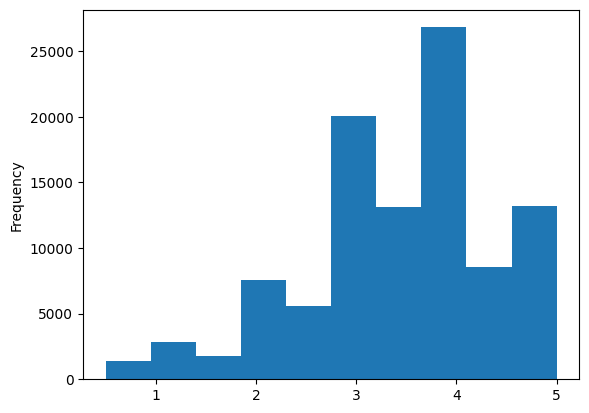

In [ ]:
notas['nota'].plot(kind='hist')

In [ ]:
notas['nota'].median()

3.5

In [ ]:
mediana = notas['nota'].median()
media = notas['nota'].mean()
print(f'Mediana é {mediana}')
print(f'Média é {media}')

Mediana é 3.5
Média é 3.501556983616962


In [ ]:
notas['nota'].describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: ylabel='nota'>

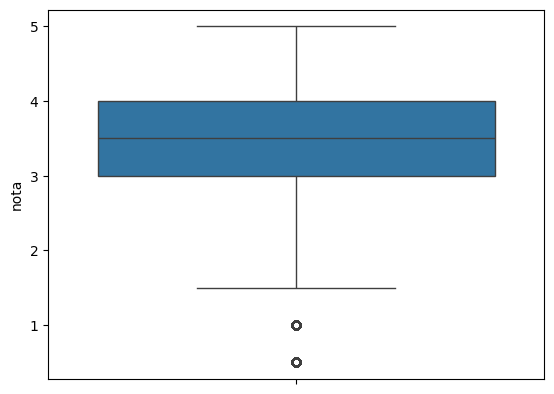

In [ ]:
import seaborn as sns

sns.boxplot(notas['nota'])

# Analisando os dados

In [ ]:
filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/ml-latest-small/movies.csv')
filmes.columns = ['filmeId', 'titulo', 'generos']
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.query('filmeId==1')['nota'].mean()

3.9209302325581397

In [ ]:
notas.query('filmeId==2')['nota'].mean()

3.4318181818181817

In [ ]:
medias_por_filme = notas.groupby('filmeId')['nota'].mean()
medias_por_filme.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


<Axes: ylabel='Frequency'>

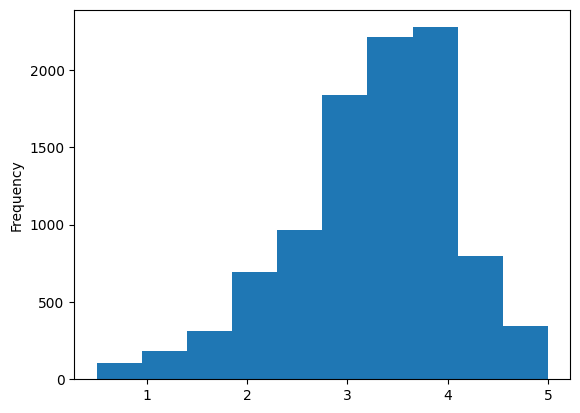

In [ ]:
medias_por_filme.plot(kind='hist')

<Axes: ylabel='nota'>

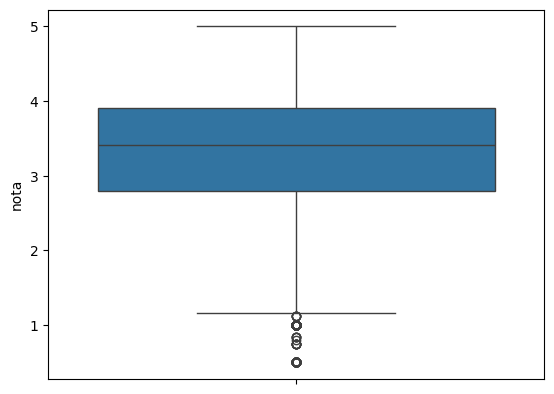

In [ ]:
sns.boxplot(medias_por_filme)

In [ ]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


Text(0.5, 1.0, 'Histograma das médias dos filmes')

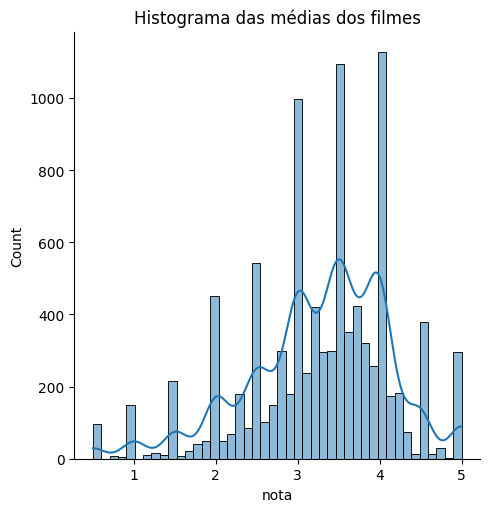

In [ ]:
import matplotlib.pyplot as plt

sns.displot(medias_por_filme, kde=True)
plt.title('Histograma das médias dos filmes')

# Entendendo os tipos de variáveis

In [ ]:
tmdb = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data-science-analise-exploratoria/main/Aula_0/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


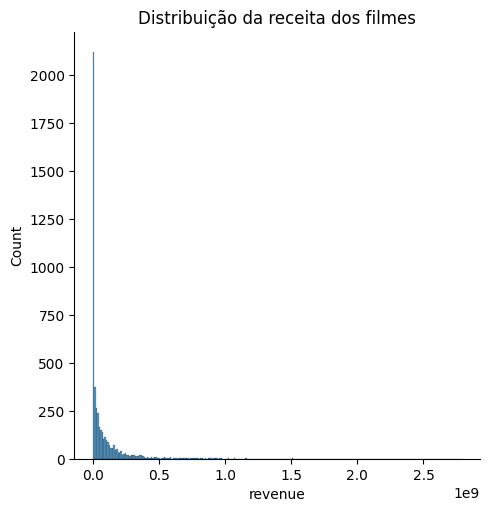

In [ ]:
sns.displot(tmdb['revenue'])
plt.title('Distribuição da receita dos filmes')
plt.show()

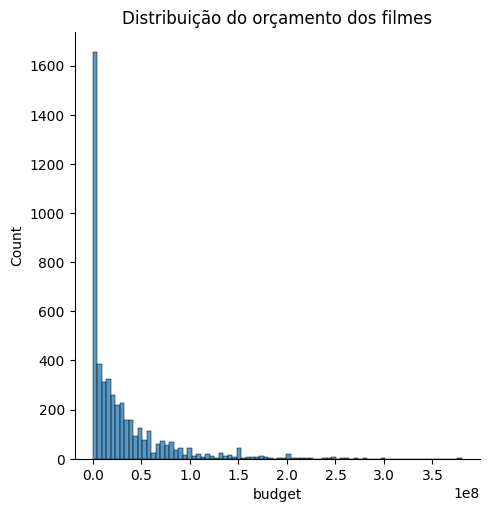

In [ ]:
# prompt: gráfico de distribuição do orçamento dos filmes (budget)

sns.displot(tmdb['budget'])
plt.title('Distribuição do orçamento dos filmes')
plt.show()

In [ ]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
tmdb.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


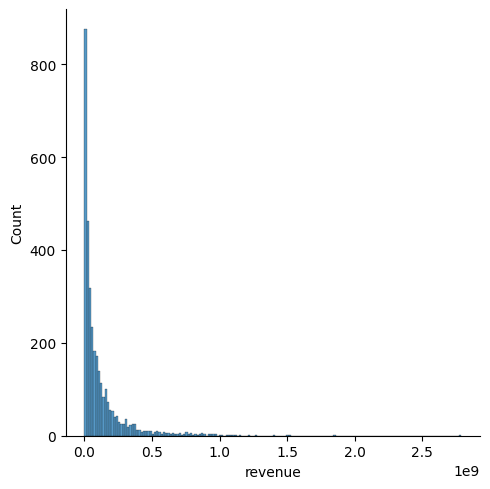

In [ ]:
com_faturamento = tmdb.query('revenue > 0')
sns.displot(com_faturamento['revenue'])

In [ ]:
tmdb['original_language'].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [ ]:
tmdb['original_language'].value_counts()

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


Como podemos filtrar os dados para gerarmos um visual com a distribuição da média das notas do TMDB (vote_average) em que o número de votos (vote_count) seja maior que 10?

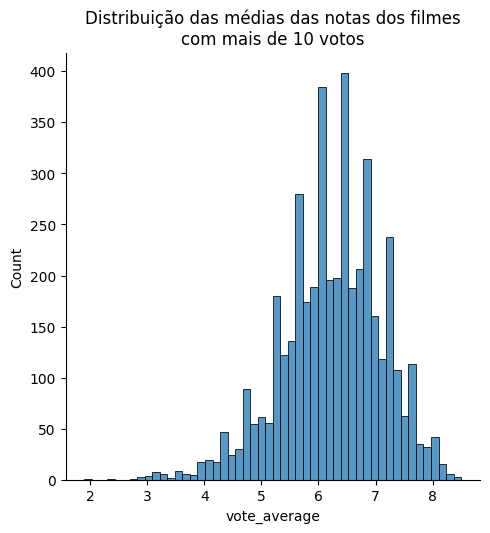

In [ ]:
mais_de_10_votos = tmdb.query("vote_count > 10")
sns.displot(mais_de_10_votos["vote_average"])
plt.title("Distribuição das médias das notas dos filmes\ncom mais de 10 votos")
plt.show()

# Visualizando os dados

In [ ]:
# nota do movielens => 0.5, 1, 1.5, ..., 5 => não tem 2.5
# quantidade de votos => 1,2,3,4,5... não existe 2.5

In [ ]:
# notas do movielens => 0.5, 1, 1.5, ..., 5 => não tem 2.5
# quantidade de vtos => 1,2,3,4,5... não existe 2.5

In [ ]:
tmdb['original_language'].value_counts().index

Index(['en', 'fr', 'es', 'zh', 'de', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'nl', 'fa', 'th', 'he', 'ta', 'cs', 'ro', 'id', 'ar', 'vi',
       'sl', 'ps', 'no', 'ky', 'hu', 'pl', 'af', 'nb', 'tr', 'is', 'xx', 'te',
       'el'],
      dtype='object', name='original_language')

In [ ]:
tmdb['original_language'].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [ ]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'total']
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='total'>

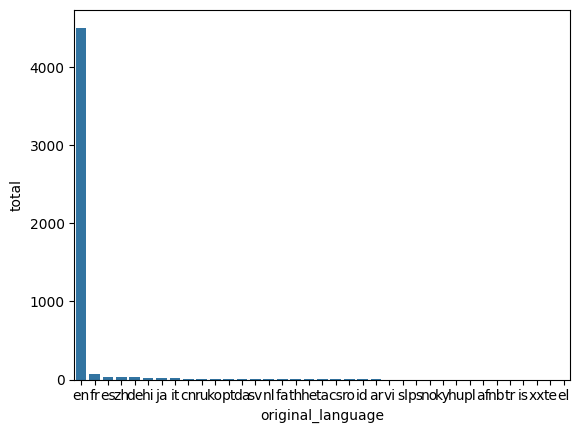

In [ ]:
sns.barplot(data=contagem_de_lingua, x='original_language', y='total')

<Axes: xlabel='original_language', ylabel='count'>

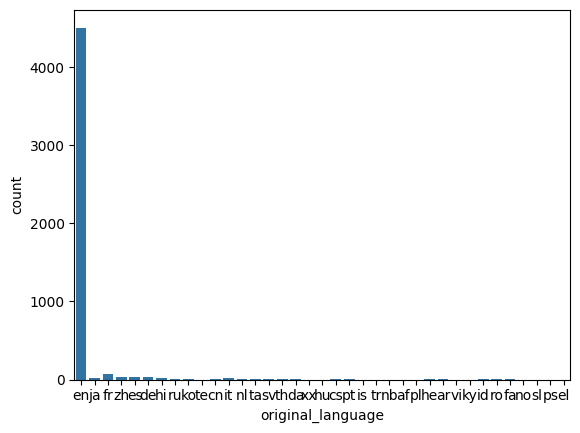

In [ ]:
sns.countplot(data=tmdb, x='original_language')

<Axes: ylabel='total'>

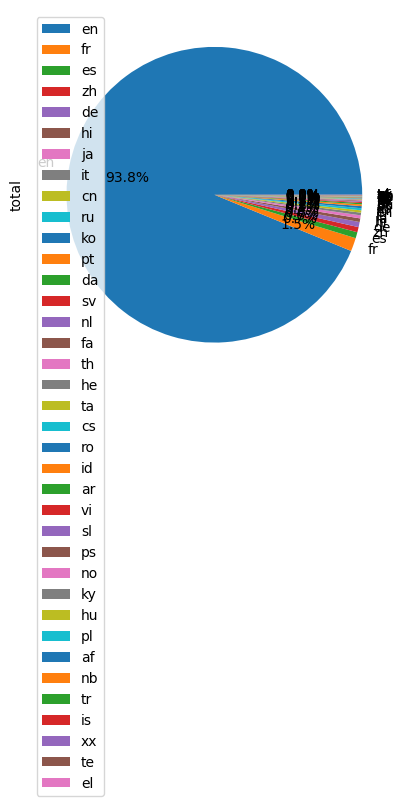

In [ ]:
contagem_de_lingua.plot(kind='pie', y='total', labels=contagem_de_lingua['original_language'], autopct='%1.1f%%')

In [ ]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_de_resto = total_geral - total_de_ingles
print(total_geral, total_de_ingles, total_de_resto)

4803 4505 298


In [ ]:
dados = {
    'lingua': ['ingles', 'outros'],
    'total': [total_de_ingles, total_de_resto]
}
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

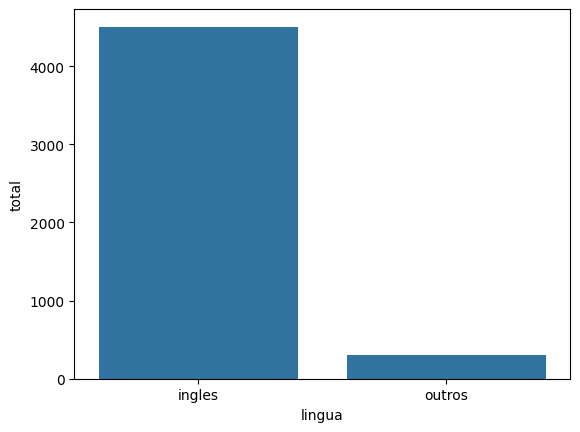

In [ ]:
sns.barplot(data=dados, x='lingua', y='total')

<Axes: ylabel='total'>

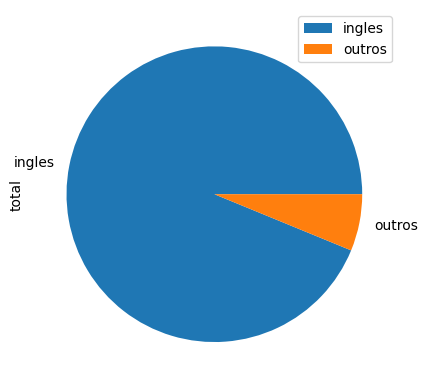

In [ ]:
dados.plot(kind='pie', y='total', labels=dados['lingua'])

In [ ]:
total_de_outros_filmes_por_lingua = tmdb.query('original_language != "en"')['original_language'].value_counts()
total_de_outros_filmes_por_lingua.head()

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19


<Axes: xlabel='original_language', ylabel='count'>

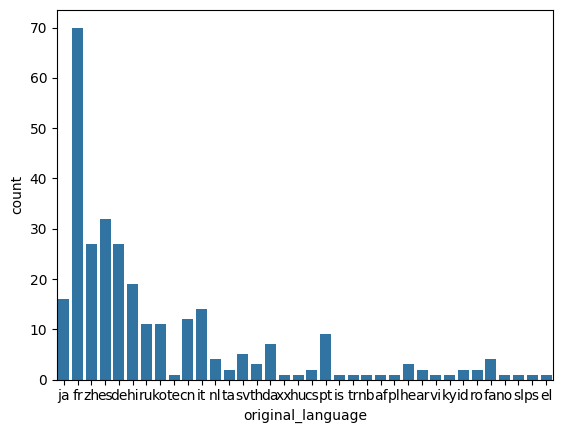

In [ ]:
sns.countplot(data=tmdb.query('original_language != "en"'),
              x='original_language')

# Ajustando os visuais

<Axes: xlabel='original_language', ylabel='count'>

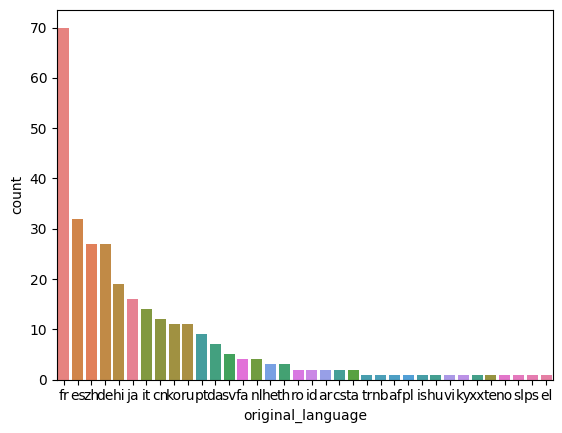

In [ ]:
sns.countplot(data=tmdb.query('original_language != "en"'),
              order=total_de_outros_filmes_por_lingua.index,
              hue='original_language',
              x='original_language')

In [ ]:
sns.color_palette('mako')

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [ ]:
tmdb.query('original_language != "en"')['original_language'].value_counts(normalize=True)

,proportion
original_language,
fr,0.234899
es,0.107383
zh,0.090604
de,0.090604
hi,0.063758
ja,0.053691
it,0.046980
cn,0.040268
ko,0.036913


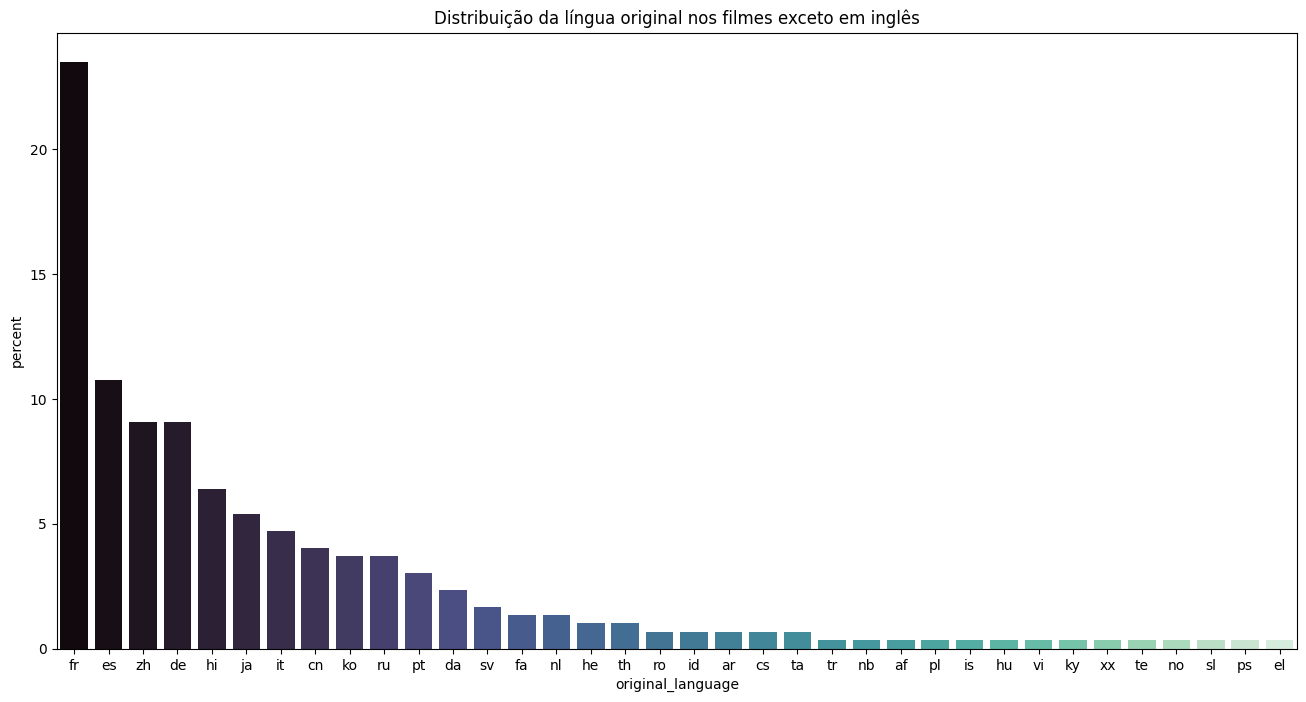

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(data=tmdb.query('original_language != "en"'),
              order=total_de_outros_filmes_por_lingua.index,
              palette='mako',
              hue='original_language',
              hue_order=total_de_outros_filmes_por_lingua.index,
              stat='percent',
              x='original_language')
plt.title('Distribuição da língua original nos filmes exceto em inglês')
plt.show()

# Estatística dos dados

In [ ]:
filmes.head(2)

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [ ]:
# prompt: Extraia as notas dos dois filmes em variáveis distintas

notas_do_toy_story = notas.query('filmeId==1')['nota']
notas_do_jumanji = notas.query('filmeId==2')['nota']

media_do_toy_story = notas.query('filmeId==1')['nota'].mean()
media_do_jumanji = notas.query('filmeId==2')['nota'].mean()

print(media_do_toy_story, media_do_jumanji)

3.9209302325581397 3.4318181818181817


In [ ]:
# prompt: mesmo mas com a mediana

# Calculate the median of movie ratings
mediana_do_toy_story = notas.query('filmeId==1')['nota'].median()
mediana_do_jumanji = notas.query('filmeId==2')['nota'].median()

print(f"Mediana do Toy Story: {mediana_do_toy_story}")
print(f"Mediana do Jumanji: {mediana_do_jumanji}")

Mediana do Toy Story: 4.0
Mediana do Jumanji: 3.5


In [ ]:
import numpy as np

filme1 = [2.5] * 10 + [3.5] * 10
filme2 = [5] * 10 + [1] * 10

In [ ]:
# prompt: imprimir a média e mediana do filme1 e filme2

media_fime1 = np.mean(filme1)
media_fime2 = np.mean(filme2)

mediana_fime1 = np.median(filme1)
mediana_fime2 = np.median(filme2)

print('Filme 1:')
print(f'Média: {media_fime1}')
print(f'Mediana: {mediana_fime1}')

print('\nFilme 2:')
print(f'Média: {media_fime2}')
print(f'Mediana: {mediana_fime2}')

Filme 1:
Média: 3.0
Mediana: 3.0

Filme 2:
Média: 3.0
Mediana: 3.0


(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

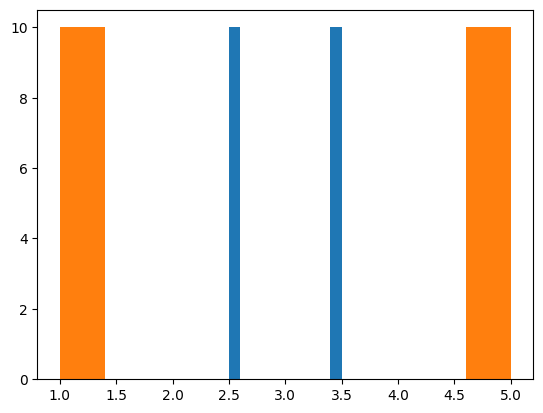

In [ ]:
plt.hist(filme1)
plt.hist(filme2)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c776dd74400>,
 'caps': [<matplotlib.lines.Line2D at 0x7c776dd766b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c776dd77400>,
 'medians': [<matplotlib.lines.Line2D at 0x7c7764cde740>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c7764e0f880>,
 'means': []}

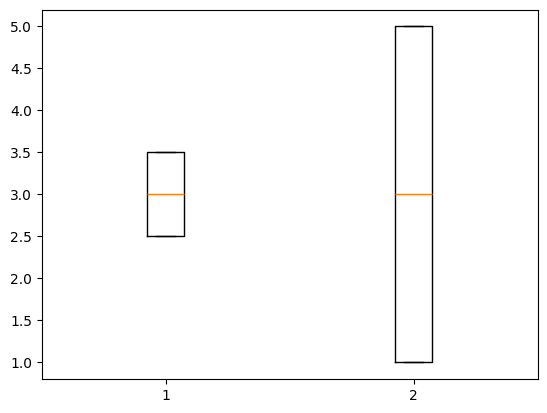

In [ ]:
plt.boxplot([filme1, filme2])

In [ ]:
filme0 = [3.0] * 20 # espalhar 0
np.mean(filme0)

3.0

In [ ]:
np.std(filme0), np.std(filme1), np.std(filme2)

(0.0, 0.5, 2.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x7c7764dbb6d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c776c1a4490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c776520b0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7c776c1a4be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7c776c1a57b0>,
 'means': []}

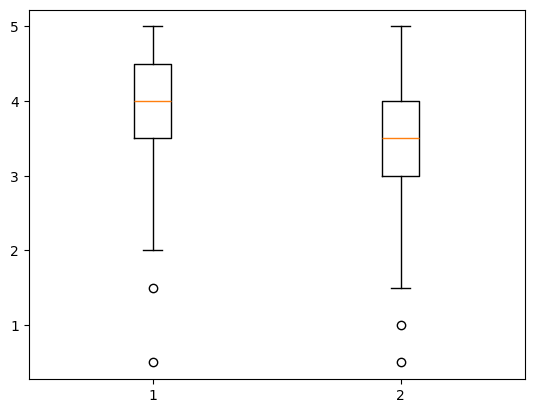

In [ ]:
plt.boxplot([notas_do_toy_story, notas_do_jumanji])

<Axes: xlabel='filmeId', ylabel='nota'>

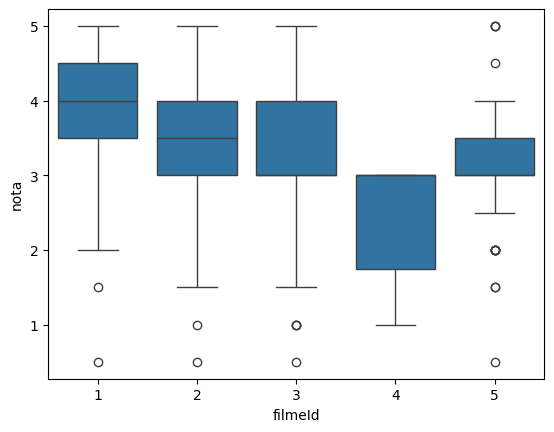

In [ ]:
sns.boxplot(data=notas.query('filmeId in [1,2,3,4,5]'),
            x='filmeId',
            y='nota')

<ipython-input-129-b96c8755888b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=notas.query('filmeId in [1,2,3,4,5]'),


<Axes: xlabel='filmeId', ylabel='nota'>

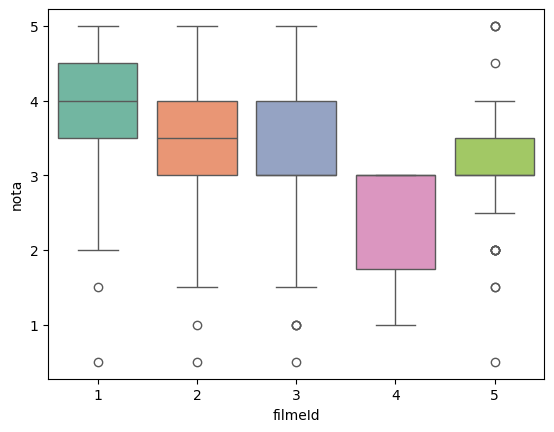

In [ ]:
sns.boxplot(data=notas.query('filmeId in [1,2,3,4,5]'),
            x='filmeId',
            y='nota',
            palette='Set2')

In [ ]:
notas.groupby('filmeId').count()

,usuarioId,nota,momento
filmeId,,,
1,215,215,215
2,110,110,110
3,52,52,52
4,7,7,7
5,49,49,49
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1


In [ ]:
notas['filmeId'].value_counts().tail()

,count
filmeId,
86279,1
86922,1
5962,1
87660,1
163981,1


In [ ]:
notas.groupby('filmeId').count().query('nota == 1')

,usuarioId,nota,momento
filmeId,,,
49,1,1,1
55,1,1,1
77,1,1,1
83,1,1,1
96,1,1,1
...,...,...,...
193581,1,1,1
193583,1,1,1
193585,1,1,1
